In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
from matplotlib import style
style.use('ggplot')

In [3]:
df = pd.read_csv("DATASETS/diabities-data/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

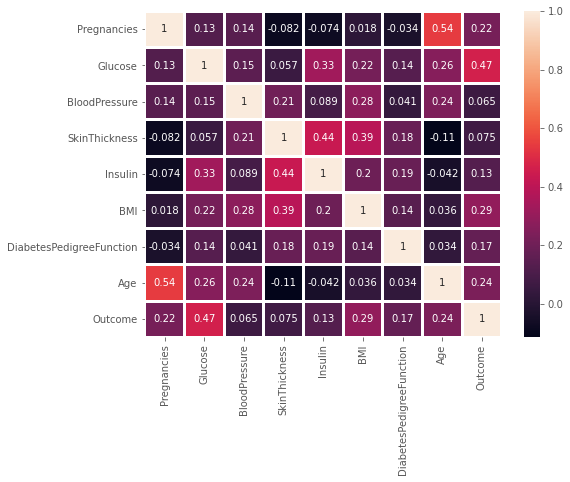

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='white')

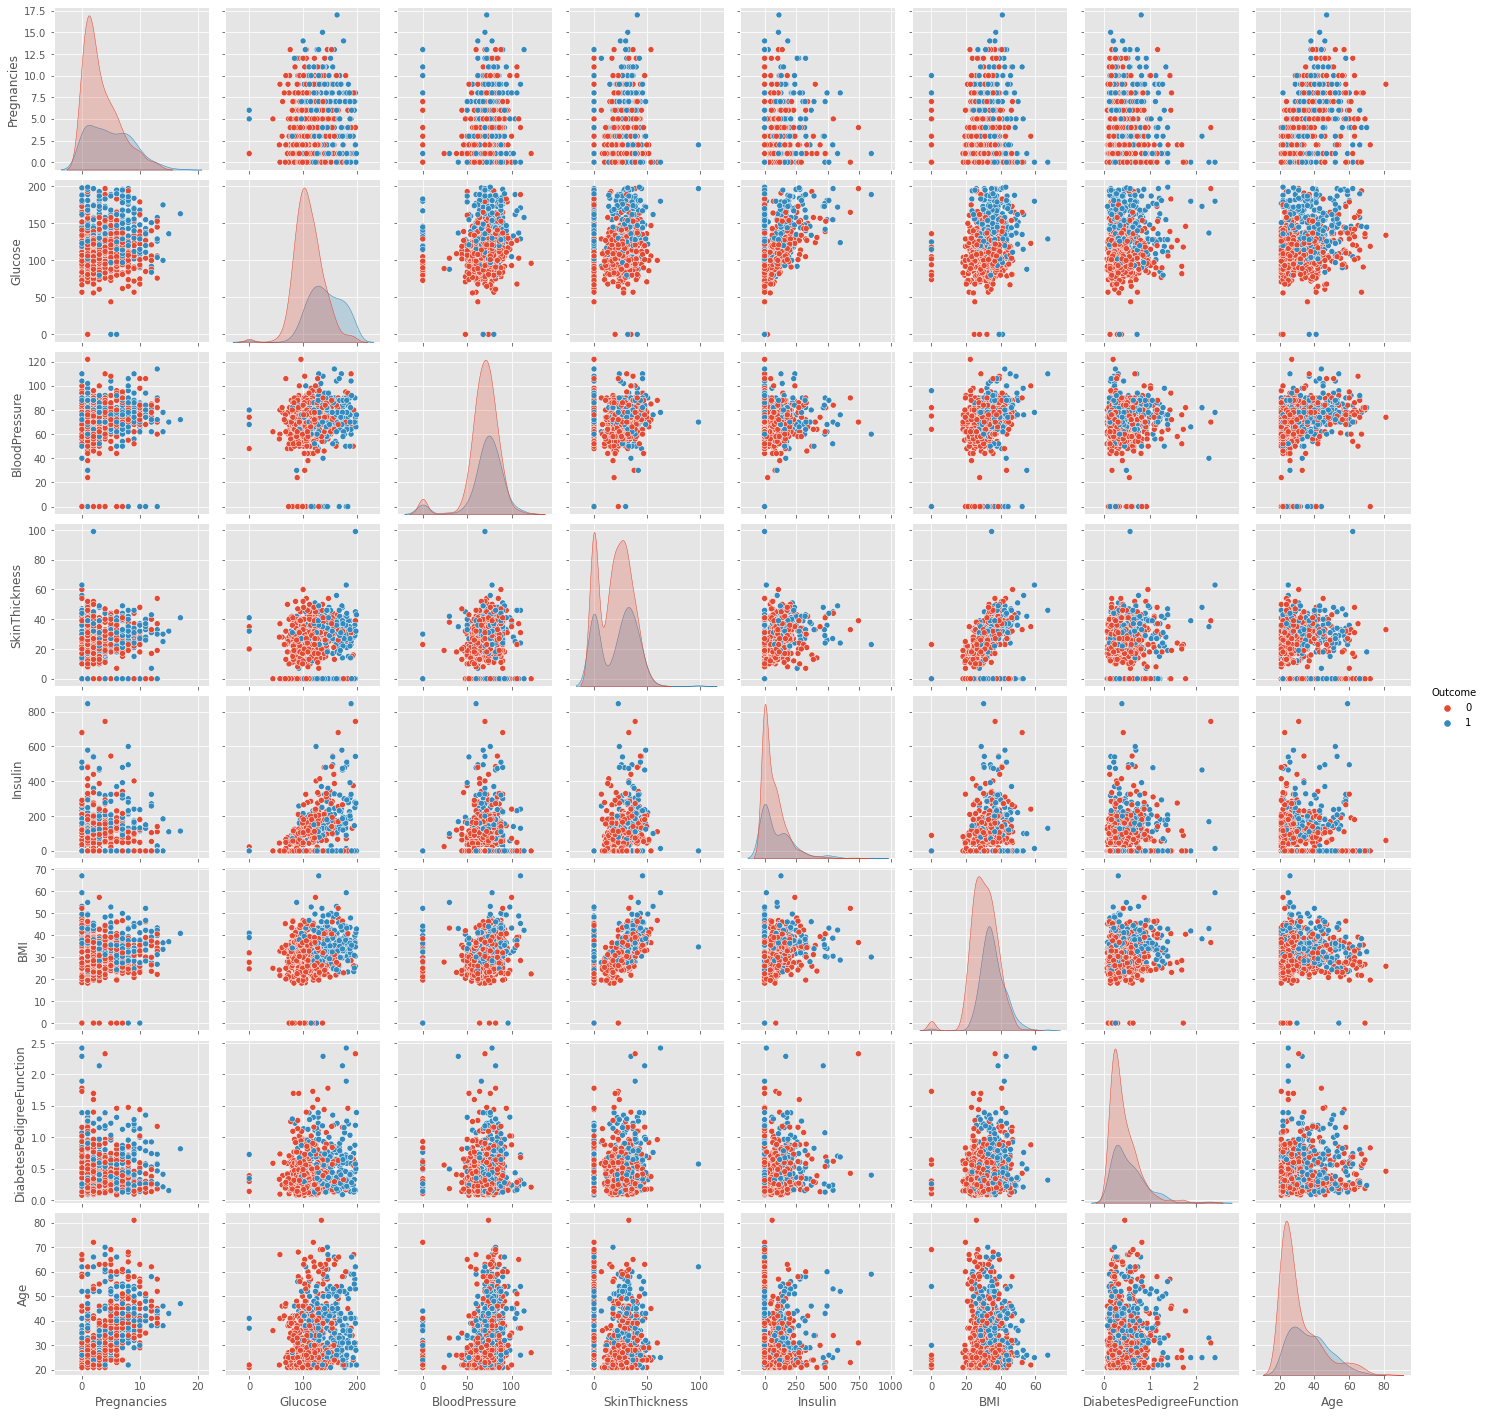

In [8]:
sns.pairplot(df,hue='Outcome')
plt.show()

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


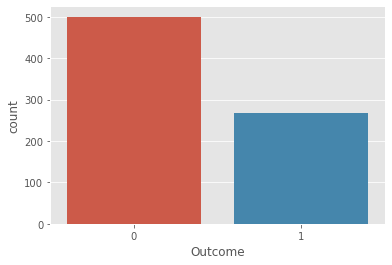

In [9]:
sns.countplot(df['Outcome'])
plt.show()

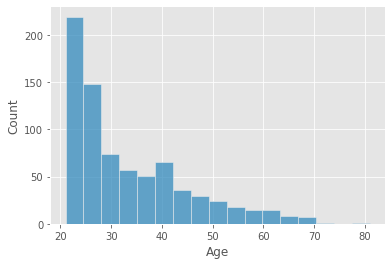

In [10]:
sns.histplot(df['Age'])
plt.show()
             

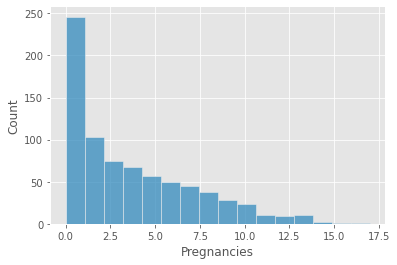

In [11]:
sns.histplot(df['Pregnancies'])
plt.show()


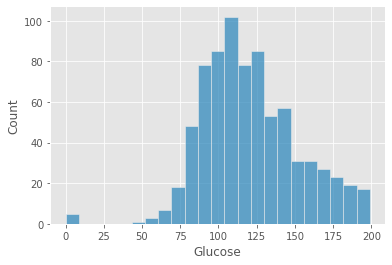

In [12]:
sns.histplot(df['Glucose'])
plt.show()


In [13]:
X = df.iloc[:,0:-1]

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y = df.iloc[:,-1]

In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.linear_model import LogisticRegression


In [19]:
model = make_pipeline(StandardScaler(),LogisticRegression())

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=1,stratify=y)

In [21]:
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [22]:
pred = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))
print('Confusion Matrix \n' ,confusion_matrix(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154

Confusion Matrix 
 [[92  8]
 [25 29]]


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = make_pipeline(StandardScaler(),RandomForestClassifier())

In [27]:
model.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [28]:
pred = model.predict(X_test)

In [29]:
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))
print('Confusion Matrix \n' ,confusion_matrix(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       100
           1       0.71      0.54      0.61        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154

Confusion Matrix 
 [[88 12]
 [25 29]]


In [30]:
# Over Sampling the minority class 

In [31]:
import imblearn

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [33]:
X_sm , y_sm = smote.fit_resample(X,y)

In [34]:
y_sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=.20,random_state=1,stratify=y_sm)

In [36]:
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))
print('Confusion Matrix \n' ,confusion_matrix(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       100
           1       0.76      0.78      0.77       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200

Confusion Matrix 
 [[76 24]
 [22 78]]


In [37]:
model = make_pipeline(StandardScaler(),RandomForestClassifier())
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))
print('Confusion Matrix \n' ,confusion_matrix(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.78      0.84      0.81       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

Confusion Matrix 
 [[76 24]
 [16 84]]


In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model = make_pipeline(StandardScaler(),KNeighborsClassifier())
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))
print('Confusion Matrix \n' ,confusion_matrix(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.76      0.82      0.79       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

Confusion Matrix 
 [[74 26]
 [18 82]]


In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
model = make_pipeline(StandardScaler(),GaussianNB())
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred = model.predict(X_test)
print("Classification Report \n")
print(classification_report(y_test,pred))
print('Confusion Matrix \n' ,confusion_matrix(y_test,pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       100
           1       0.74      0.70      0.72       100

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200

Confusion Matrix 
 [[76 24]
 [30 70]]
